<a href="https://colab.research.google.com/github/HauwaUmar/DATA-6100/blob/main/Final%20Project%20(Data%206100).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Executive Summary

Being international students and having friends from all around the world under the same campus; this piqued our interest in learning about diverse cultures, particularly their cuisines. We came across a competition on Kaggle to learn more about different cuisines and at the same time improve our text analysis (NLP) skills. 

[(Link to competition)](https://www.kaggle.com/competitions/whats-cooking)

The dataset was acquired from Yummly; an American website and mobile app that provides users recipes via recommendations and a search engine.
It contains 3 features which include:
- the recipe id
- the type of cuisine 
- the list of ingredients of each recipe
It is stored in a json format.

A train and test set were provided for the prediction with over 30,000 & 9,500 observation respectively. There are 20 unique cuisines in the dataset.
The goal of the project is to predict the cuisine a particular recipe belongs to. 

To start with, basic data exploration was performed to depict certain relationships and trends in the dataset.A word cloud showed some common ingredients across different cuisines. It was also noticed that some cuisines had more recipies than others.

For the data preprocessing step, some text cleaning processes where implemented coupled with word lemmatization on the ingredients column. This was then passed through TF-IDF vectorizer that transforms the text into a usable vector.

 Two classification methods were implemented based on the nature of the dataset
 - Logistic Regression
 - Support Vector Classifier

 After implementing both models, the SVC coupled with hyperparameter tuning did the best prediction with a kaggle score of 0.803.



# Best Kaggle score

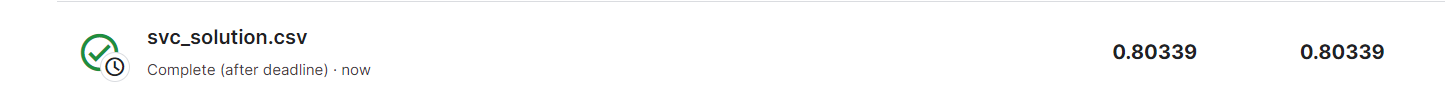

# Ethic Discussion

The dataset was provided by Yummly which allows anyone with a blog to add recipes on the site. Below the ethics behind the dataset and model will be discussed:
- No infringement of personal data in the data set.
- There are cuisines that could have similar ingredients and or recipes, for example, chinese and japanese cuisines. This model can be sensitive to people in the field of Gastronomy.
- It is arguable that yummly makes use of other people's recipes but credit is being given to the authors.

# Detailed Report

In [ ]:
#Importing relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import seaborn as sb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# loading test and train dataset
train = pd.read_json("/content/train.json")
test = pd.read_json("/content/test.json")

In [ ]:
print("The size of the train dataset: {}".format(train.shape))
print("The size of the test dataset: {}".format(test.shape))

The size of the train dataset: (39774, 3)
The size of the test dataset: (9944, 2)


## Exploratory Data Analysis

In [ ]:
#showingt the first 5  records on the train dataset
train.head()

,id,cuisine,ingredients,ingredients_clean_string,ingredients_string
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce , black olives , grape tomatoe...",romaine lettuce black olives grape tomatoes ga...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour , ground pepper , salt , tomatoes ...",plain flour ground pepper salt tomato ground b...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs , pepper , salt , mayonaise , cooking oil...",egg pepper salt mayonaise cooking oil green ch...
3,22213,indian,"[water, vegetable oil, wheat, salt]","water , vegetable oil , wheat , salt",water vegetable oil wheat salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","black pepper , shallots , cornflour , cayenne ...",black pepper shallot cornflour cayenne pepper ...


In [ ]:
test

,id,ingredients,ingredients_clean_string,ingredients_string
0,18009,"[baking powder, eggs, all-purpose flour, raisi...","baking powder , eggs , all-purpose flour , rai...",baking powder egg all purpose flour raisin mil...
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...","sugar , egg yolks , corn starch , cream of tar...",sugar egg yolks corn starch cream of tartar ba...
2,41580,"[sausage links, fennel bulb, fronds, olive oil...","sausage links , fennel bulb , fronds , olive o...",sausage links fennel bulb frond olive oil cuba...
3,29752,"[meat cuts, file powder, smoked sausage, okra,...","meat cuts , file powder , smoked sausage , okr...",meat cuts file powder smoked sausage okra shri...
4,35687,"[ground black pepper, salt, sausage casings, l...","ground black pepper , salt , sausage casings ,...",ground black pepper salt sausage casings leek ...
...,...,...,...,...
9939,30246,"[large egg yolks, fresh lemon juice, sugar, bo...","large egg yolks , fresh lemon juice , sugar , ...",large egg yolks fresh lemon juice sugar bourbo...
9940,36028,"[hot sauce, butter, sweet potatoes, adobo sauc...","hot sauce , butter , sweet potatoes , adobo sa...",hot sauce butter sweet potatoes adobo sauce salt
9941,22339,"[black pepper, salt, parmigiano reggiano chees...","black pepper , salt , parmigiano reggiano chee...",black pepper salt parmigiano reggiano cheese r...
9942,42525,"[cheddar cheese, cayenne, paprika, plum tomato...","cheddar cheese , cayenne , paprika , plum toma...",cheddar cheese cayenne paprika plum tomatoes g...


In [ ]:
#Checking for empty values
train.isnull().sum()

id                          0
cuisine                     0
ingredients                 0
ingredients_clean_string    0
ingredients_string          0
dtype: int64

The dataset has no empty values present in it

Text(0.5, 1.0, 'Frequencies of Cuisine')

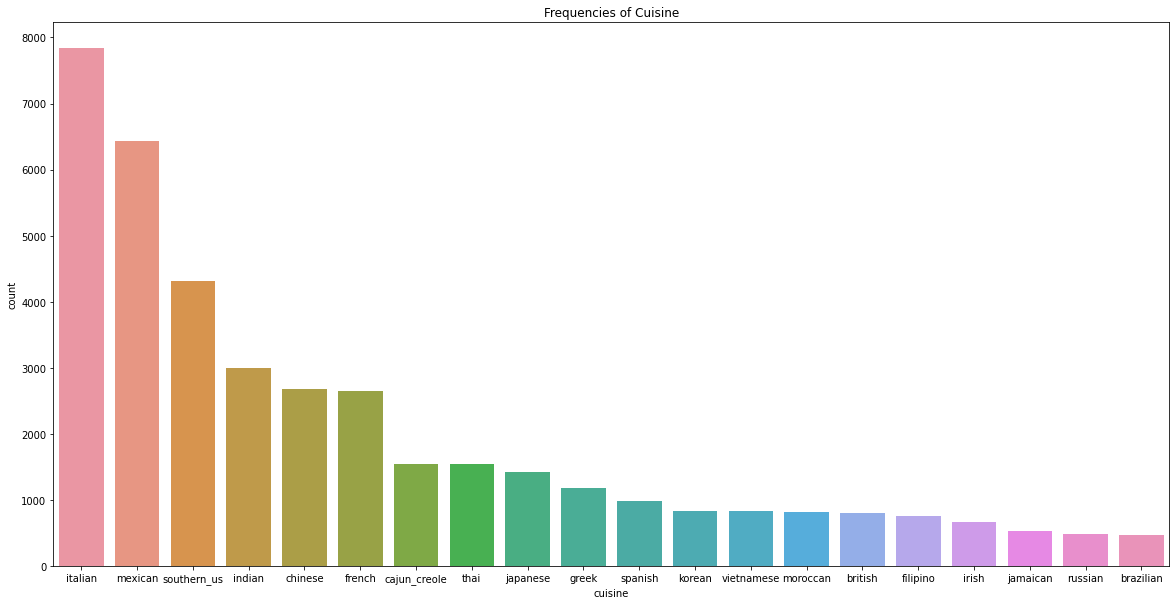

In [ ]:

# ploting frequencies of cuisine from highest to lowest
plt.figure(figsize=(20,10))
sb.countplot(x=train['cuisine'],order = train['cuisine'].value_counts().index)
plt.title('Frequencies of Cuisine')

The plot depicts that the dataset mostly consists of Italian and Mexican recipes.

In [ ]:
# making a list of all the ingredients 
ingredient_list = []
for x in train['ingredients']:
    for y in x:
        ingredient_list.append(y)

# creating dataframe of unique ingredients and their counts      
ingredient_list = pd.Series(ingredient_list)
data = ingredient_list.value_counts().sort_values(ascending=False)
data = pd.DataFrame(data,columns=['count'])
data.reset_index(inplace=True)
data_train = data.rename(columns={'index':'ingredient'})

In [ ]:
# making a list of all the ingredients 
ingredient_list = []
for x in test['ingredients']:
    for y in x:
        ingredient_list.append(y)

# creating dataframe of unique ingredients and their counts      
ingredient_list = pd.Series(ingredient_list)
data = ingredient_list.value_counts().sort_values(ascending=False)
data = pd.DataFrame(data,columns=['count'])
data.reset_index(inplace=True)
data_test = data.rename(columns={'index':'ingredient'})

In [ ]:
print("The number of unique ingredients in the dataset: {}".format(len(data)))

The number of unique ingredients in the dataset: 4484


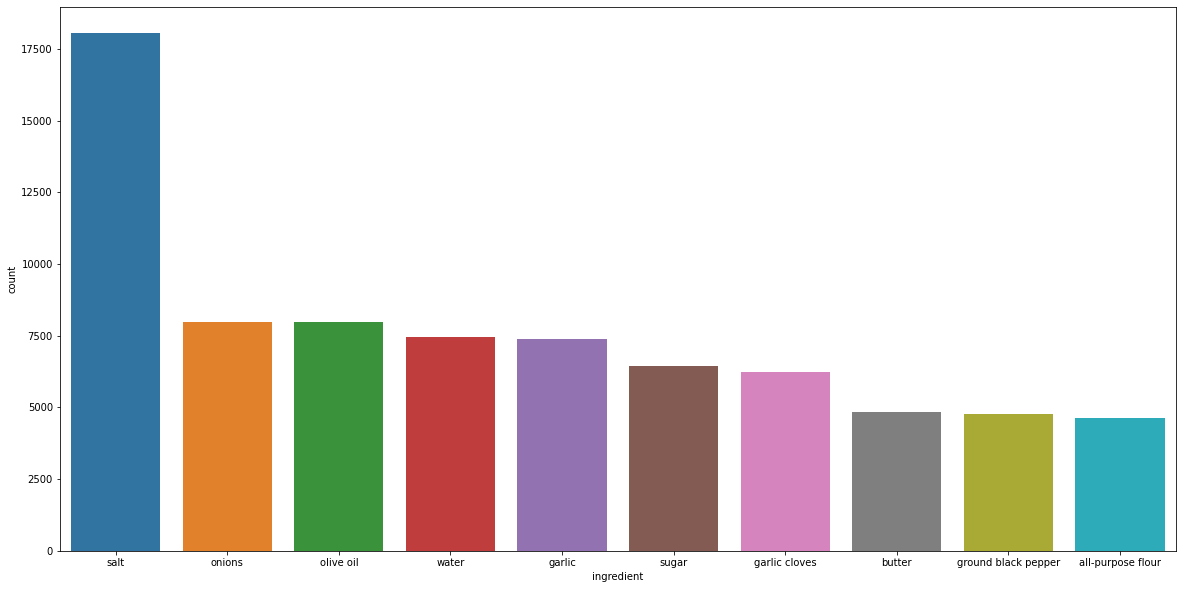

In [ ]:
# plotting top 10 ingredients in the dataset 
plt.figure(figsize=(20,10))
sns.barplot(data=data_train.head(10), x="ingredient", y="count")

The plot depicts that salt is the most used ingredient in all the recipies.

In [ ]:
# plotting least used ingredients in the dataset 
plt.figure(figsize=(20,10))
px.bar(data_train.tail(10), x="ingredient", y="count",color="ingredient")

<Figure size 1440x720 with 0 Axes>

This plot depicts the least used ingredients in the reciepies 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



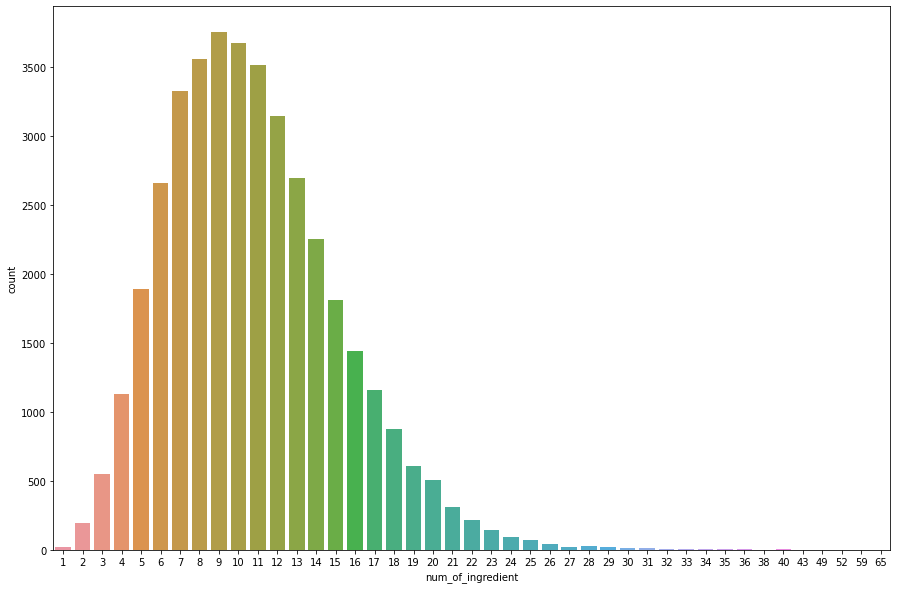

In [ ]:
train['num_of_ingredient'] = train['ingredients'].apply(len)
numbers = train['ingredients'].apply(len).unique()

fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(train.num_of_ingredient)

The main takeaways from this plot are:
- Over 3,500 recipes have 10 ingredients 
- Very few recipes use more than 25 ingredients

In [ ]:
# scatter plot of cuisine vs number of ingredient per recipe
px.scatter(train, x="cuisine", y="num_of_ingredient", color="cuisine",
                 size='num_of_ingredient', hover_data=['num_of_ingredient'])

The main takeaways from this plots are:
- Indian, Italian and Brazillian cuisines have recipes that use over 45 ingredients.
- Otherwise most cuisines have about 30 ingredients.

In [ ]:
#counting the number of ingredients for each cuisine 
from collections import Counter
counters = {}
for cuisine in train['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (train['cuisine'] == cuisine)
    for ingredients in train[indices]['ingredients']:
        counters[cuisine].update(ingredients)

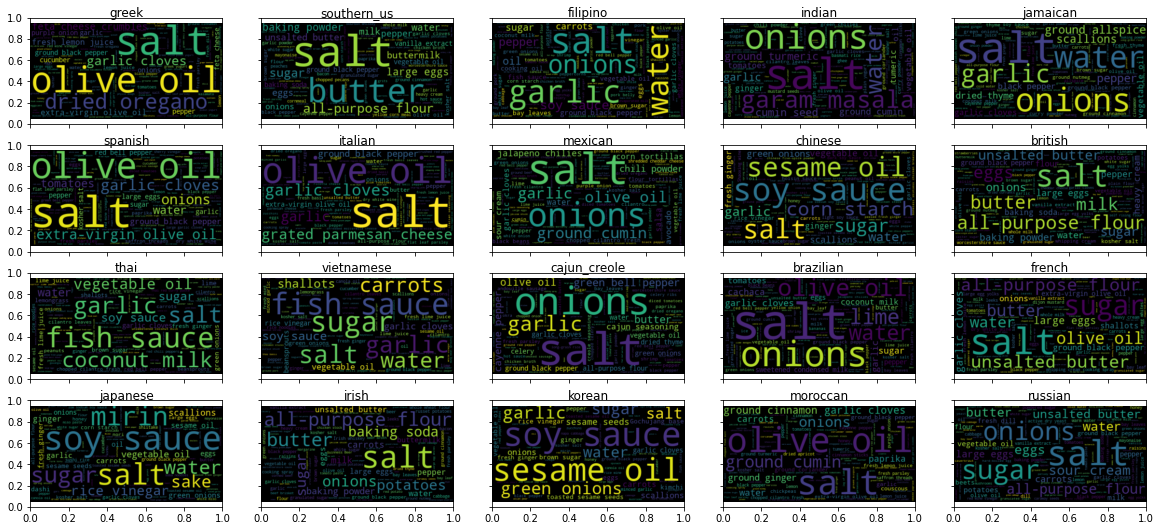

In [ ]:
#generating wordclouds for each cuisine 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
fig, axes = plt.subplots(4, 5, figsize=(20, 9),sharex='col', sharey='row')
for cuisine, ax_index in zip(counters, range(1,21)): 
    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(frequencies=counters[cuisine])
    fig.add_subplot(4, 5, ax_index)    
    plt.title(cuisine)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

Each wordcloud represents the ingredients used in each cuisine and the size of each word corresponds to its frequency. The plot depicts the following:
- Salt is the most used ingredient in most of the cuisines.
- There are ingredients that are common in some cuisines but not in orders e.g. olive oil is common in Spanish, Italian, Moroccan, Greek and Brazillian cuisines but not common in the other cuisines.

## Data Preprocessing

Natural language must be represented numerically in order to be processed. Text vectorization is the process of converting text into a numerical feature. The calculation for TF-IDF is very simple and easy to understand, making it one of the most popular text vectorizers. It assigns the uncommon term high weight and the common term low weight. 

Before applying tf-idf, the ingredient column will go through some text cleaning processes.

Download wordnet and omw-1.4 to google collab to successfully import WordNetLemmatizer

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### Text Cleaning

Change the ingredidents from list to one string

In [ ]:
# clean data
#converting each ingredients list in one string: ' word1, word2, ...'
train['ingredients_clean_string'] = [' , '.join(z).strip() for z in train['ingredients']]  
test['ingredients_clean_string'] = [' , '.join(z).strip() for z in test['ingredients']]

**Lemmatization**

Text preprocessing includes both stemming and lemmatization. Both are frequently used interchangeably. Lemmatization is similar to stemming but it adds context to words. As a result, it connects words with similar meanings to a single word. In fact, lemmatization is preferred over stemming because it performs morphological analysis on the words.

For example:  

- onions = onion 
- corpora = corpus
- cooking = cook

In [ ]:
import re
from nltk import WordNetLemmatizer
# further clean data and extract information through word lemmatization
train['ingredients_string'] = [' '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) 
                                         for line in lists]).strip() for lists in train['ingredients']]

test['ingredients_string'] = [' '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) 
                                          for line in lists]).strip() for lists in test['ingredients']]

In [ ]:
# create corpus based on newly processed data
train_corpus = train['ingredients_string']
test_corpus = test['ingredients_string']

### Feature Extraction (TF-IDF Vectorizer)

TF-IDF calculates a word's originality by comparing the number of times a word appears in a document to the number of documents the word appears in.

TF-IDF is a text vectorizer that transforms the text into a usable vector. It combines two ideas: term frequency (TF) and document frequency (DF) .

The term frequency is the number of times a specific term appears in a document. The frequency of occurrence of a term in a document indicates its importance. Term frequency represents each text in the data as a matrix, with rows representing the number of documents and columns representing the number of distinct terms across all documents.
    
The number of documents that contain a specific term is referred to as document frequency. It indicates how common the term is.

The weight of a term is inverse document frequency (IDF), which aims to reduce the weight of a term if its occurrences are spread across all documents.
    
The TF-IDF score as the name suggests is just a multiplication of the term frequency matrix with its IDF,

In [ ]:
# convert a collection of raw documents to a matrix of TF-IDF features
train_vectorizer = TfidfVectorizer(stop_words='english',
                             ngram_range = ( 1 , 1 ),
                             analyzer="word", 
                             max_df = .57 , 
                             binary=False , 
                             token_pattern=r'\w+' , 
                             sublinear_tf=True)



In [ ]:
# transform the corpus to a dense matrix representation
train_tfidf = train_vectorizer.fit_transform(train_corpus).todense()
test_tfidf = train_vectorizer.transform(test_corpus).todense()

# assigning the cuisine column to a new variable
train_target = train['cuisine']

## Modelling

In this section, two models will be implemented. The models were chosen based on the nature of our datasets:
- the number of classes to predict 
- the size of the data set

The models planned to be implemented include:
- Logistic Regression
- Support Vector Classifier 

The evaluation metric to determine the performance of the model is accuracy and AUC-ROC. The Kaggle competition also provides a test data set for submission and uses accuracy for evaluation

In [ ]:
# splitting train dataset into another train and test set
X_train, X_test, y_train, y_test = train_test_split(train_tfidf, train['cuisine'], test_size = 0.2, random_state = 0, stratify = train_target)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(31819, 2963) (31819,)
(7955, 2963) (7955,)


Logistic regression has different types of solver that handle multinomial loss and C value which is the inverse of regularization strength. For teh purpose of this project, solver will be set to 'Newton-cg' as it works well with multiclass problems

In [ ]:
# create logistic regression object 
model = LogisticRegression(solver='newton-cg', C = 2)

# fit the model
model.fit(X_train, y_train)

# predicting X_test
y_pred = model.predict(X_test)
                              

# evaluating
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


              precision    recall  f1-score   support

   brazilian       0.80      0.59      0.68        93
     british       0.56      0.42      0.48       161
cajun_creole       0.75      0.63      0.69       309
     chinese       0.77      0.88      0.82       535
    filipino       0.79      0.66      0.72       151
      french       0.60      0.66      0.63       529
       greek       0.79      0.69      0.74       235
      indian       0.86      0.91      0.88       601
       irish       0.67      0.45      0.54       133
     italian       0.80      0.89      0.84      1568
    jamaican       0.80      0.74      0.77       105
    japanese       0.87      0.65      0.74       284
      korean       0.85      0.80      0.82       166
     mexican       0.91      0.92      0.91      1288
    moroccan       0.89      0.71      0.79       164
     russian       0.74      0.41      0.53        98
 southern_us       0.70      0.81      0.75       864
     spanish       0.65    

From the recall column, the model did a good job predicting recipies that were mexican, indian & chinese but did not do as well for russian, british & irish cuisines. 

Overall, the model predicted accurately 79% of the times.

In [ ]:
# predicting kaggle test dataset with model
predicted_cuisine = model.predict(test_tfidf)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [ ]:
# creating submission file
submission = pd.DataFrame({'id': test['id'],
                           'cuisine': predicted_cuisine})
submission.to_csv('log_reg_solution.csv', index=False)

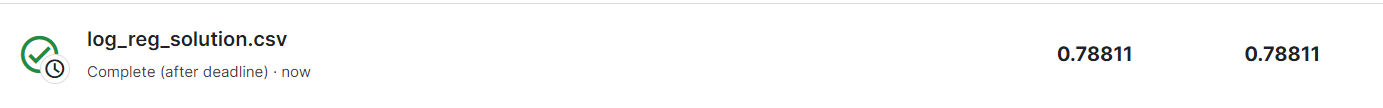

**Support Vector Classifier**

Support Vector Classifier (SVC) is a supervised machine learning technique that is commonly used for classification problems. SVC works by mapping data points to a high-dimensional space and then determining the best hyperplane for categorizing the data.

Python sklearn library has a function that implements SVC. This function also takes parameters C and gamma that affect how the model works. They help with hyperparemeter tuning to avoid overfittig or underfitting


C is a regularization parameter that gives a penalty to each misclassified data point. The smaller C is the smaller the penalty while it is the opposite when C is larger which results in a decision boundary with a smaller margin. Because the problem is multiclass in nature, it makes more sense to give C a large value.

As for gamma parameters, low values indicates more points being grouped together. For high values, the points need to be very close to each other in order to be considered in the same group (or class). Therefore, models with very large gamma values tend to overfit. 


In order to not overfit and not have C become neglible, gamma is set to a low value.

In [ ]:
from sklearn.svm import SVC
#set C to a high value
C= 600

#set gamma to a low value
gamma = 0.95

clf = SVC(C=float(C), gamma=float(gamma), kernel='rbf')

In [ ]:
# fitting the model
clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


SVC(C=600.0, gamma=0.95)

In [ ]:
# predict the test set created
y_pred_2 = clf.predict(X_test)

# show classification report
print(classification_report(y_test, y_pred_2))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


              precision    recall  f1-score   support

   brazilian       0.80      0.66      0.72        93
     british       0.64      0.56      0.60       161
cajun_creole       0.77      0.69      0.73       309
     chinese       0.78      0.89      0.83       535
    filipino       0.81      0.66      0.73       151
      french       0.63      0.71      0.66       529
       greek       0.82      0.72      0.77       235
      indian       0.86      0.92      0.89       601
       irish       0.70      0.56      0.63       133
     italian       0.81      0.89      0.85      1568
    jamaican       0.84      0.73      0.78       105
    japanese       0.85      0.68      0.76       284
      korean       0.89      0.82      0.86       166
     mexican       0.92      0.92      0.92      1288
    moroccan       0.89      0.74      0.81       164
     russian       0.79      0.47      0.59        98
 southern_us       0.77      0.81      0.79       864
     spanish       0.69    

From the recall column, the model did a good job predicting recipes that were mexican,indian & italian but did not do as well for russian, british & irish cuisines. 

Overall, the model predicted accurately 81% of the times.

In [ ]:
# predicting the test set provided by kaggle
final_y_pred = clf.predict(test_tfidf)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [ ]:
# creating submission file
submission = pd.DataFrame({'id': test['id'],
                           'cuisine': final_y_pred})
submission.to_csv('svc_solution.csv', index=False)

Kaggle score for SVC

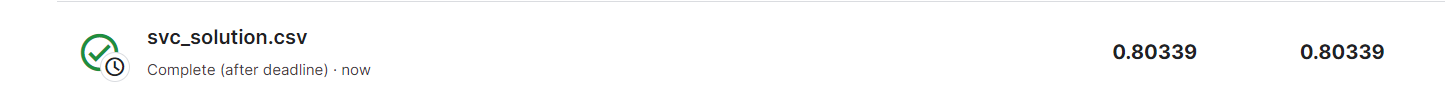

# Interpretations of Coefficients

Model interpretability is just as important as model accuracy. Even if our model has high accuracy it is essential to know how it is making the predictions. Although it is not always straight forward to interpret the model performance, especially for multi-class predictions. 

For interpretation of model coefficients, a python package called ELI5 is being used. ELI5 helps in inspecting and explaining ML classifier predictions.

The 'weights' shows us the contribution of each feature in predicting the output.

In [ ]:
#install eli5 
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 7.8 MB/s 
     |████████████████████████████████| 133 kB 62.3 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=526108335a107a7e3ab5d09fcfa24160081450ca96df0a827229318a93c67cfb
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

## Logistic Regression

In [ ]:
import eli5
eli5.show_weights(model, vec=train_vectorizer, top=20)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


According to the logistic regression model:

**Brazillian Cuisines**

Cachaca and Lime in recipes increases the chances of the recipe being Brazillian cuisine

**Indian Cuisines**

Curry and Masala in recipes increases the chances of the recipe being Indian while sauce and egg are less likely to be seen in Indian recipes.

**Chinese Cuisines**

Ginger and Soy in recipes increases the chances of the recipe being Chinese while Onions and butter are less likely to be seen in Chinese recipes.

**Russian Cuisines**

Dill and Beet in recipes increases the chances of the recipe being Russian while garlic and sauce are less likely to be seen in Russian recipes.

**British Cuisines**

Worcestershire and malt in recipes increases the chances of the recipe being British while chicken and garlic are less likely to be seen in British recipes.




## Support Vector Classifier

In [ ]:
eli5.show_weights(clf, vec=train_vectorizer, top=20)

This library only works when the svc kernel is set to linear. Another method of understanding the coeffients has been implement below.

In [ ]:
model_targets = clf.classes_
model_targets = [ele for ele in model_targets if ele != 'vietnamese']
for i, tag in enumerate(model_targets):
    coefficients = clf.dual_coef_[i]
    weights = list(zip(train_vectorizer.get_feature_names(),coefficients))
    print('Tag:',tag)
    print('Most Positive Coefficients:')
    print(sorted(weights,key=lambda x: -x[1])[:10])
    print('Most Negative Coefficients:')
    print(sorted(weights,key=lambda x: x[1])[:10])
    print("--------------------------------------")

Tag: brazilian
Most Positive Coefficients:
[('barley', 4.68003488479729), ('bertolli', 2.8667758514001433), ('broccoli', 2.54753170636027), ('beet', 2.537071188800788), ('bananas', 2.3403403687699695), ('believe', 2.2677656149100702), ('brine', 2.2317872980782187), ('beech', 2.046091023463923), ('basil', 2.04152973292617), ('assorted', 2.001873137358286)]
Most Negative Coefficients:
[('mountain', -3.6290877056987885), ('soba', -2.8983281481532353), ('shimeji', -2.8681648690385226), ('decorating', -2.597710135339054), ('mostarda', -2.4519987746145895), ('horseradish', -2.2167451732267955), ('seed', -2.0216773623875324), ('sobrasada', -2.0113632739412646), ('tortellini', -1.9956862707477203), ('milkfish', -1.9490595293165822)]
--------------------------------------
Tag: british
Most Positive Coefficients:
[('beefsteak', 3.8803610782533813), ('basil', 3.8116543145117983), ('broccoli', 3.663587207319753), ('barley', 3.6546129892445762), ('ale', 3.3611913577798553), ('cuttlefish', 3.3488751

According to the Support Vector Classifier model:

**Brazillian Cuisines**

Barley and Broccoli in recipes increases the chances of the recipe being Brazillian cuisine while  soba and shimeji are less likely to be seen in Brazillian recipes which makes sense because they are japanese ingredients.

**Indian Cuisines**

Cactus and Fideos in recipes increases the chances of the recipe being Indian while abura and acid  are less likely to be seen in Indian cuisines.

**Chinese Cuisines**

Sheepshead and anchovy in recipes increases the chances of the recipe being a Chinese cuisine. 

**Russian Cuisines**

Gari and meat in recipes increases the chances of the recipe being a Russian cuisine.

**British Cuisines**

Beefsteak and Basil in recipes increases the chances of the recipe being British while seed and milkfish are less likely to be seen in British cuisines.


## Comparison of models coefficients

Although SVC has a higher accuracy score, from interpretation of the coefficients Logistic regression seems to make more sense than the coefficients of the SVC.

For example,
the logistic regression model showed that recipes with curry and masala have a higher chance of being Indian cuisines while the support vector machine showed that recipes with cactus and fideos  higher chance of being Indian cuisines.

# Conclusion

The Support Vector Classifier model did a better job at correctly classifying cuisines with accuracy score of 80%. This is mainly because it works better with multiclass problems and text analysis. 





# Reference

- https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167
- https://www.analyticsvidhya.com/blog/2021/06/support-vector-machine-better-understanding/
- https://towardsdatascience.com/tf-idf-simplified-aba19d5f5530
- https://www.analyticsvidhya.com/blog/2020/11/demystifying-model-interpretation-using-eli5/